# LAB 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder as lb
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor as DTR
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
import math
import datetime
import seaborn as sns

## Problem 1

### Part 1

In [144]:
df = pd.read_csv("/content/drive/MyDrive/PRML/Lab2/ENB2012_data.xlsx - Φύλλο1.csv")

In [145]:
cols = df.columns
dataframe = pd.DataFrame(data = df,columns = cols)
dataframe = df.dropna()
Y = dataframe['Y1']
X = dataframe.copy()
for headers in X.columns[0:len(X.columns)-1]:
  for i in range(X[headers].size):
    try:
      X[headers][i] = X[headers][i].astype(float)
    except:
      X[headers][i] = 0
for i in X.columns[0:len(X.columns)-1]:
  X[i] = normalize([X[i]])[0]
X_train,temp1,Y_train,temp2 = tts(X,Y,test_size = 0.3,shuffle = True)
X_validate,X_test,Y_validate,Y_test = tts(temp1,temp2,test_size = 1/3,shuffle = True)
print(X_train.shape,X_validate.shape,X_test.shape)
X

<ipython-input-145-561ab8cc24da>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[headers][i] = X[headers][i].astype(float)


(537, 9) (154, 9) (77, 9)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.045840,0.027405,0.033001,0.021825,0.045644,0.019642,0.000000,0.000000,15.55
1,0.045840,0.027405,0.033001,0.021825,0.045644,0.029463,0.000000,0.000000,15.55
2,0.045840,0.027405,0.033001,0.021825,0.045644,0.039284,0.000000,0.000000,15.55
3,0.045840,0.027405,0.033001,0.021825,0.045644,0.049105,0.000000,0.000000,15.55
4,0.042098,0.030015,0.035751,0.024250,0.045644,0.019642,0.000000,0.000000,20.84
...,...,...,...,...,...,...,...,...,...
763,0.029936,0.041760,0.038501,0.043650,0.022822,0.049105,0.053548,0.056183,17.88
764,0.029001,0.043065,0.041251,0.043650,0.022822,0.019642,0.053548,0.056183,16.54
765,0.029001,0.043065,0.041251,0.043650,0.022822,0.029463,0.053548,0.056183,16.44
766,0.029001,0.043065,0.041251,0.043650,0.022822,0.039284,0.053548,0.056183,16.48


### Part 2

#### Variying hyperparameters 

##### i) Max_depth

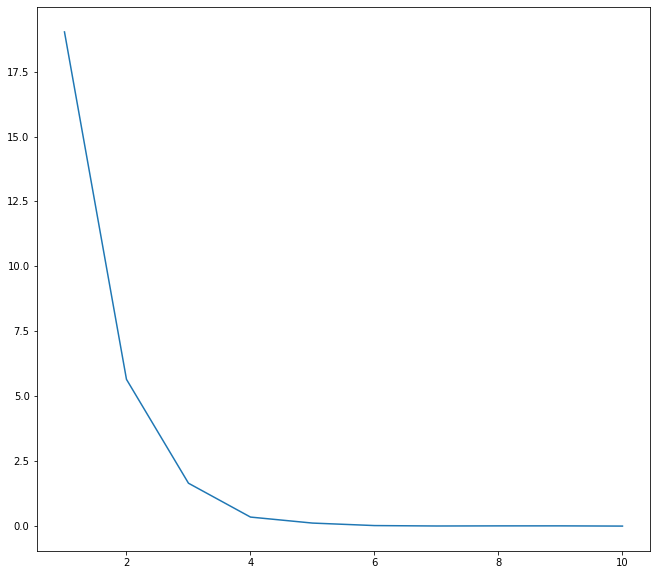

In [146]:
def training_model_based_on_max_depth():
  max_depth_arr = [1,2,3,4,5,6,7,8,9,10]
  mse_arr = []
  for i in range(1,11):
    model = DTR(criterion="squared_error",max_depth = i)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_validate)
    mse_arr.append(mse(y_pred,Y_validate))
  plt.plot(max_depth_arr,mse_arr)
  plt.show()
  return mse_arr.index(min(mse_arr)) + 1
max_depth_require = training_model_based_on_max_depth()

##### ii) Min_sample_leaf

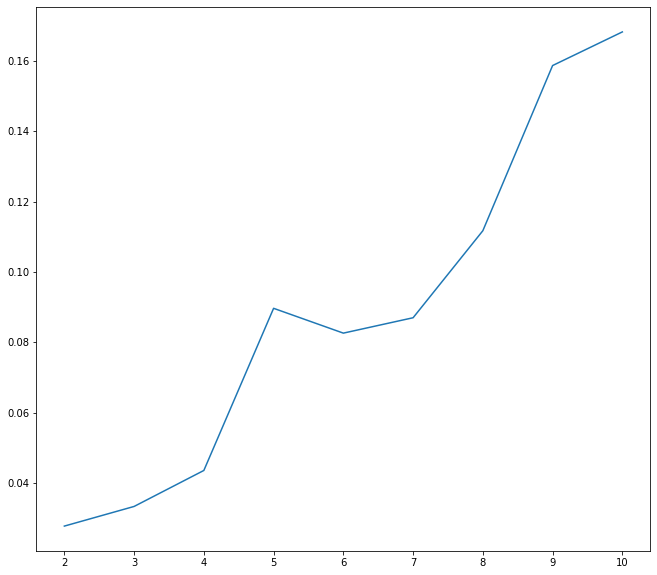

3


In [147]:
def training_model_based_on_min_sample_leaf():
  min_sample_leaf_arr = [2,3,4,5,6,7,8,9,10]
  mse_arr = []
  for i in range(2,11):
    model = DTR(criterion="squared_error",min_samples_leaf = i)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_validate)
    mse_arr.append(mse(y_pred,Y_validate))
  plt.plot(min_sample_leaf_arr,mse_arr)
  plt.show()
  if(mse_arr.index(min(mse_arr))==0):
    return min_sample_leaf_arr[mse_arr.index(min(mse_arr[1:]))]
  else:
    return min_sample_leaf_arr[mse_arr.index(min(mse_arr))]
min_samples_leaf_require = training_model_based_on_min_sample_leaf()
print(min_samples_leaf_require)

##### iii) Max_features


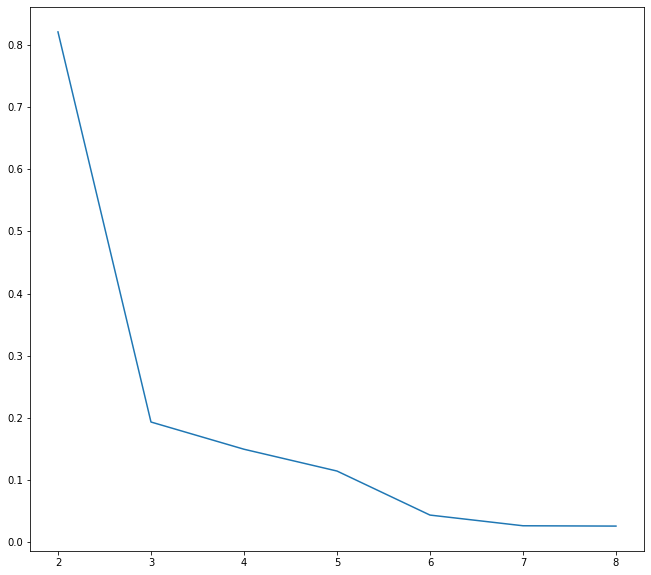

8


In [148]:
def training_model_based_on_max_features():
  max_features_arr = [2,3,4,5,6,7,8]
  mse_arr = []
  for i in range(2,9):
    model = DTR(criterion="squared_error",max_features= i)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_validate)
    mse_arr.append(mse(y_pred,Y_validate))
  plt.plot(max_features_arr,mse_arr)
  plt.show()
  if(mse_arr.index(min(mse_arr))==0):
    return max_features_arr[mse_arr.index(min(mse_arr[1:]))]
  else:
    return max_features_arr[mse_arr.index(min(mse_arr))]
max_features_require = training_model_based_on_max_features()
print(max_features_require)

### Part 3

In [149]:
model = DTR(criterion="squared_error",max_depth=max_depth_require,max_features=max_features_require,min_samples_leaf=min_samples_leaf_require)
model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))
print(mse(Y_test,model.predict(X_test)))
print(cvs(model,X_test,Y_test).mean())

0.9992459348170605
0.08070792316017326
0.9904549748083173


In [150]:
kfold = KFold(5)
results=cvs(model,X_test,Y_test,cv=kfold)
print(results)
print(results.mean())

[0.99557134 0.9895716  0.98878805 0.95162691 0.9855022 ]
0.982212020348493


In [151]:
rkfold = RepeatedKFold(n_splits=5,n_repeats=5)
result = cvs(model,X_test,Y_test,cv = rkfold)
print(result)
print(results.mean())

[0.99579498 0.99773435 0.98701509 0.94664839 0.99555791 0.98671735
 0.99204476 0.98825463 0.99124105 0.98925572 0.99624069 0.98783929
 0.97992079 0.99138788 0.99217751 0.98715791 0.99262532 0.99510298
 0.99668783 0.9810375  0.98476795 0.99582544 0.99132729 0.96677709
 0.99455043]
0.982212020348493


[Text(0.5366271820448878, 0.9545454545454546, 'X[8] <= 21.71\nsquared_error = 100.096\nsamples = 537\nvalue = 22.1'),
 Text(0.28576995012468825, 0.8636363636363636, 'X[8] <= 13.425\nsquared_error = 7.645\nsamples = 279\nvalue = 13.346'),
 Text(0.0946072319201995, 0.7727272727272727, 'X[8] <= 9.29\nsquared_error = 3.168\nsamples = 152\nvalue = 11.345'),
 Text(0.02493765586034913, 0.6818181818181818, 'X[8] <= 7.14\nsquared_error = 0.534\nsamples = 16\nvalue = 6.847'),
 Text(0.0199501246882793, 0.5909090909090909, 'X[8] <= 6.585\nsquared_error = 0.152\nsamples = 13\nvalue = 6.568'),
 Text(0.00997506234413965, 0.5, 'X[1] <= 0.037\nsquared_error = 0.029\nsamples = 7\nvalue = 6.239'),
 Text(0.004987531172069825, 0.4090909090909091, 'squared_error = 0.001\nsamples = 3\nvalue = 6.043'),
 Text(0.014962593516209476, 0.4090909090909091, 'squared_error = 0.0\nsamples = 4\nvalue = 6.385'),
 Text(0.029925187032418952, 0.5, 'X[0] <= 0.032\nsquared_error = 0.023\nsamples = 6\nvalue = 6.952'),
 Text(0.

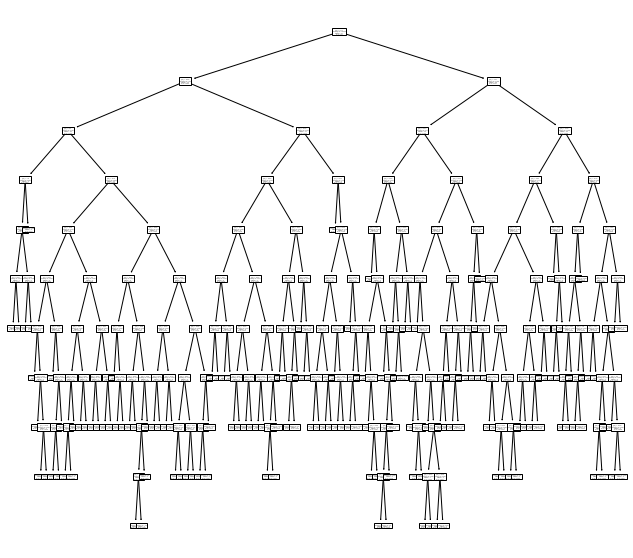

In [152]:
tree.plot_tree(model)

### Part 4 

In [157]:
model_L2 = DTR(criterion="squared_error")
model_L1 = DTR(criterion="absolute_error")
print("L1")
model_L1.fit(X_train,Y_train)
print(model_L1.score(X_test,Y_test))
# print(cvs(model_L1,X_test,Y_test).mean())
print("L2")
model_L2.fit(X_train,Y_train)
print(model_L2.score(X_test,Y_test))
# print(cvs(model_L2,X_test,Y_test).mean())

L1
0.9996323293581979
L2
0.9997753642918821


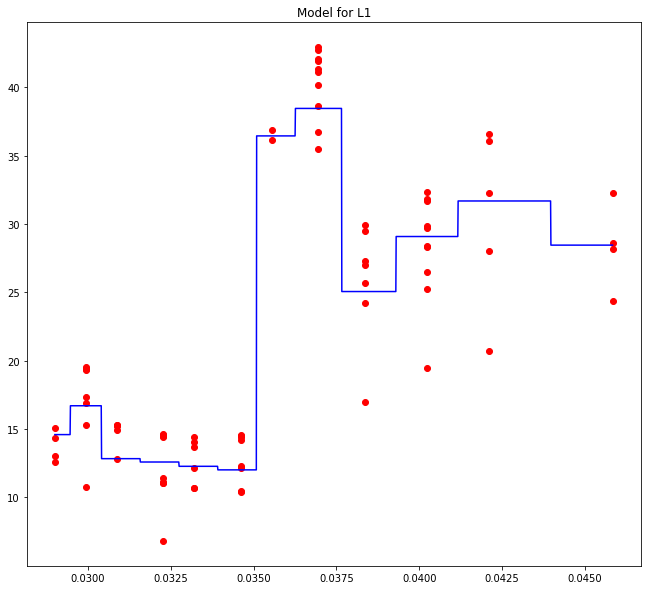

In [154]:

X_grid = np.arange(min(X_test["X1"]), max(X_test["X1"]), 0.00001)
X_grid = X_grid.reshape((len(X_grid), 1)) 

model_L1.fit(X_train["X1"].to_numpy().reshape(len(X_train["X1"]),1),Y_train)
Y_pred = model_L1.predict(X_grid)

plt.scatter(X_test["X1"], Y_test, color = 'red')
plt.plot(X_grid,Y_pred,color = 'blue')
plt.title("Model for L1")
plt.show()
# X_train

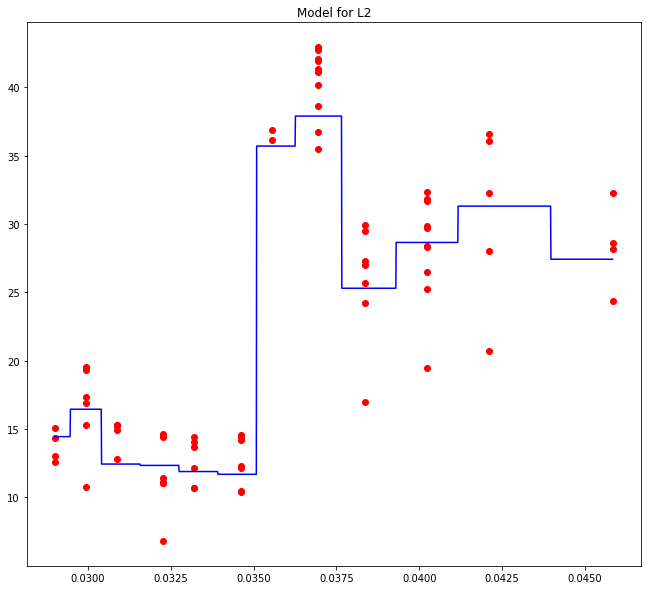

In [155]:
X_grid = np.arange(min(X_test["X1"]), max(X_test["X1"]), 0.00001)
X_grid = X_grid.reshape((len(X_grid), 1)) 

model_L2.fit(X_train["X1"].to_numpy().reshape(len(X_train["X1"]),1),Y_train)
Y_pred = model_L2.predict(X_grid)

plt.scatter(X_test["X1"], Y_test, color = 'red')
plt.plot(X_grid,Y_pred,color = 'blue')
plt.title("Model for L2")
plt.show()

## Problem 2

#### Part 1

In [ ]:
columns = ["sepal_length","sepal_width","petal_length","petal_width","class"]
irisdataset = pd.read_csv("/content/drive/MyDrive/PRML/Lab2/irisdataset.csv",names=columns)
irisdataset = irisdataset.dropna()
X = irisdataset.copy()
X = X.drop("sepal_length",axis= 1)
X = X.drop("sepal_width",axis= 1)
XX = X.copy()
XX = XX.drop("class",axis = 1)
irisdataset["class"] = lb().fit_transform(irisdataset["class"])
Y = irisdataset["class"]
X_train_2,X_test_2,Y_train_2,Y_test_2 = tts(XX,Y,test_size = 0.2,shuffle=True)
print(X_train_2.shape,X_test_2.shape)


(120, 2) (30, 2)


[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [41, 41, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.499\nsamples = 79\nvalue = [0, 41, 38]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

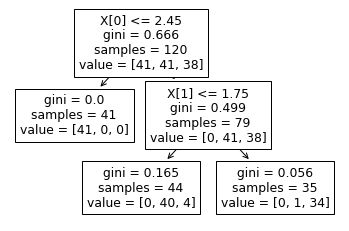

In [ ]:
model_2 = DTC(max_depth=2)
model_2.fit(X_train_2,Y_train_2)
tree.plot_tree(model_2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(0.0, 7.890000000000001, -0.9, 3.490000000000004)

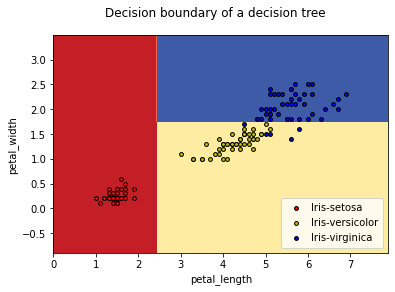

In [ ]:
plot_colors = "ryb"
plot_step = 0.01
columns = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
x_min, x_max = X["petal_length"].min() - 1, X["petal_length"].max() + 1
y_min, y_max = X["petal_width"].min() - 1, X["petal_width"].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=1.0, w_pad=1.0, pad=5.0)

Z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel("petal_length")
plt.ylabel("petal_width")

for i, color in zip(range(3), plot_colors):
    index = np.where(Y == i)
    plt.scatter(X["petal_length"][index[0]], X["petal_width"][index[0]],label = columns[i], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision boundary of a decision tree")
plt.legend(loc='lower right', borderpad=0.5, handletextpad=0.5)
plt.axis("tight")


#### Part 2

(149, 2) (149,)
(119, 2) (30, 2)


[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\ngini = 0.666\nsamples = 119\nvalue = [37, 42, 40]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 42, 40]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.124\nsamples = 45\nvalue = [0, 42, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

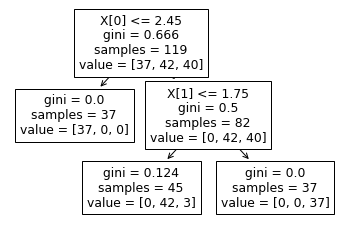

In [ ]:
idx = X[(X["petal_length"] == 4.8)&(X["petal_width"])&(X["class"] == "Iris-versicolor")].index
X_new = X.copy()
Y_new = Y.copy()
X_new = X_new.drop([idx[0]],axis = 0)
X_new = X_new.drop("class",axis = 1)
Y_new = Y_new.drop([idx[0]],axis = 0)
X_new = X_new.set_index(np.arange(len(X_new)))
print(X_new.shape,Y_new.shape)
X_train_2_new,X_test_2_new,Y_train_2_new,Y_test_2_new = tts(X_new,Y_new,test_size = 0.2,shuffle=True)
print(X_train_2_new.shape,X_test_2_new.shape)
new_model_2 = DTC(max_depth = 2)
new_model_2.fit(X_train_2_new,Y_train_2_new)
tree.plot_tree(new_model_2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(0.0, 7.890000000000001, -0.9, 3.490000000000004)

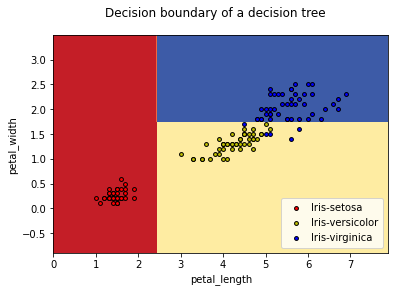

In [ ]:
plot_colors = "ryb"
plot_step = 0.01

x_min, x_max = X_new["petal_length"].min() - 1, X_new["petal_length"].max() + 1
y_min, y_max = X_new["petal_width"].min() - 1, X_new["petal_width"].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=1.0, w_pad=1.0, pad=5.0)

Z = new_model_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)


plt.xlabel("petal_length")
plt.ylabel("petal_width")

for i, color in zip(range(3), plot_colors):
    index = np.where(Y_new == i)
    plt.scatter(X_new["petal_length"][index[0]], X_new["petal_width"][index[0]],label = columns[i], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision boundary of a decision tree")
plt.legend(loc='lower right', borderpad=0.5, handletextpad=0.5)
plt.axis("tight")

### Part 3

[Text(0.4, 0.9285714285714286, 'X[0] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [37, 41, 42]'),
 Text(0.3, 0.7857142857142857, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'X[0] <= 4.85\ngini = 0.5\nsamples = 83\nvalue = [0, 41, 42]'),
 Text(0.2, 0.6428571428571429, 'X[1] <= 1.65\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3, 0.5, 'X[0] <= 4.65\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.8, 0.6428571428571429, 'X[1] <= 1.75\ngini = 0.13\nsamples = 43\nvalue = [0, 3, 40]'),
 Text(0.7, 0.5, 'X[0] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.6, 0.35714285714285715, 'X[1] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.5, 0.21428571428571427, 'X[0] <= 4.95\ngini = 0.444\n

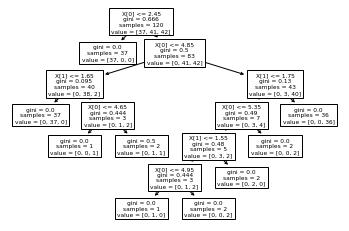

In [ ]:
X_train_3_new,X_test_3_new,Y_train_3_new,Y_test_3_new = tts(X[["petal_length","petal_width"]],Y,test_size = 0.2,shuffle=True)
new_model_3 = DTC(max_depth = None)
new_model_3.fit(X_train_3_new,Y_train_3_new)
tree.plot_tree(new_model_3)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(0.0, 7.890000000000001, -0.9, 3.490000000000004)

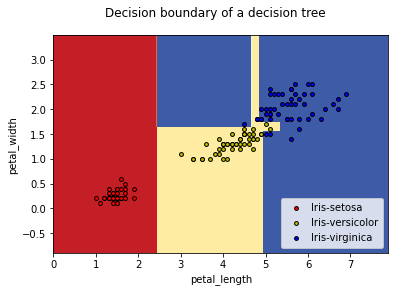

In [ ]:
plot_colors = "ryb"
plot_step = 0.01
columns = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
x_min, x_max = X["petal_length"].min() - 1, X["petal_length"].max() + 1
y_min, y_max = X["petal_width"].min() - 1, X["petal_width"].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=1.0, w_pad=1.0, pad=5.0)

Z = new_model_3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel("petal_length")
plt.ylabel("petal_width")

# Plot the training points
for i, color in zip(range(3), plot_colors):
    index = np.where(Y == i)
    plt.scatter(X["petal_length"][index[0]], X["petal_width"][index[0]],label = columns[i], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision boundary of a decision tree")
plt.legend(loc='lower right', borderpad=0.5, handletextpad=0.5)
plt.axis("tight")

### Part 4

In [ ]:
Y = []
X_req = []
X_req2 = []
for i in range(100):
   x = round(np.random.uniform(0.00, 2.50), 2)
   X_req.append(x)
   Y.append(0)
for i in range(100):
   x = round(np.random.uniform(2.51, 5.00), 2)
   X_req.append(x)
   Y.append(1)
# print(X_req)
for i in range(200):
  x = round(np.random.uniform(0.00, 5.00), 2)
  X_req2.append(x)
# print(X_req2)
my_arr = np.c_[X_req,X_req2]
# print(my_arr)
columns = ["X1","X2"]
dataset = pd.DataFrame(my_arr,columns = columns)
dataset["Y"] = Y
dataset = dataset.sample(frac = 1)
dataset = dataset.set_index(np.arange(200))
Y_nn = dataset["Y"]
X_nn = dataset.copy()
X_nn = X_nn.drop("Y",axis = 1)
dataset

,X1,X2,Y
0,3.73,3.13,1
1,4.39,3.07,1
2,2.33,4.65,0
3,3.59,3.90,1
4,1.25,3.92,0
...,...,...,...
195,1.67,2.39,0
196,4.60,2.49,1
197,1.78,3.95,0
198,2.81,1.46,1


[Text(0.5, 0.75, 'X[0] <= 2.51\ngini = 0.499\nsamples = 160\nvalue = [77, 83]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 77\nvalue = [77, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 83\nvalue = [0, 83]')]

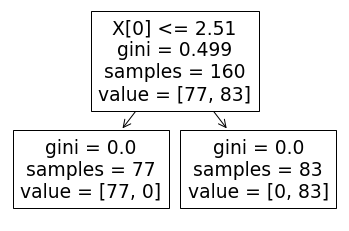

In [ ]:
X_train_nn,X_test_nn,Y_train_nn,Y_test_nn = tts(X_nn,Y_nn,test_size = 0.2,shuffle = True)
model_req  = DTC(max_depth = 2)
model_req.fit(X_train_nn,Y_train_nn)
tree.plot_tree(model_req)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


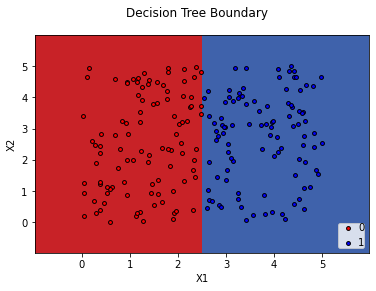

In [ ]:
plot_colors = "rb"
plot_step = 0.01
X = X_nn.to_numpy()
y = Y_nn.to_numpy()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0, w_pad=0, pad=0)

Z = model_req.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel("X1")
plt.ylabel("X2")

# Plot the training points
for i, color in zip(range(2), plot_colors):
  index = np.where(y == i)
  plt.scatter(X[index, 0], X[index, 1], c=color, label = i,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision Tree Boundary")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.562\ngini = 0.499\nsamples = 160\nvalue = [83, 77]'),
 Text(0.25, 0.5, 'X[0] <= 2.128\ngini = 0.436\nsamples = 106\nvalue = [34, 72]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.23\nsamples = 83\nvalue = [11, 72]'),
 Text(0.75, 0.5, 'X[0] <= 4.805\ngini = 0.168\nsamples = 54\nvalue = [49, 5]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.494\nsamples = 9\nvalue = [4, 5]')]

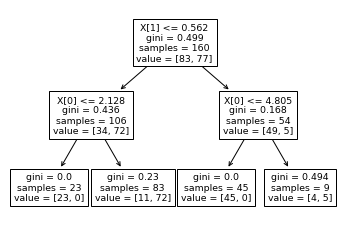

In [ ]:
pi = math.pi
cos = math.cos
sin = math.sin
theta  = (-1)*(pi*0.25)
X = X_nn.to_numpy()
y = Y_nn.to_numpy()
for i in X:
  temp1 = i[0]
  temp2 = i[1]
  i[0] = temp1*cos(theta) - temp2*sin(theta)
  i[1] = temp1*sin(theta) + temp2*cos(theta)
X_train_nn,X_test_nn,Y_train_nn,Y_test_nn = tts(X_nn,Y_nn,test_size = 0.2,shuffle = True)
model_req  = DTC(max_depth = 2)
model_req.fit(X_train_nn,Y_train_nn)
tree.plot_tree(model_req)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


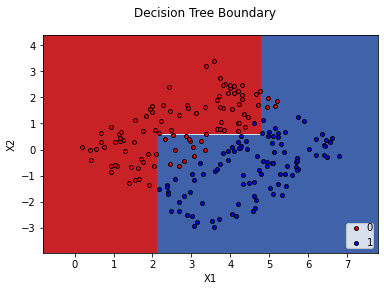

In [ ]:
plot_colors = "rb"
plot_step = 0.01

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = model_req.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel("X1")
plt.ylabel("X2")

# Plot the training points
for i, color in zip(range(2), plot_colors):
  index = np.where(y == i)
  plt.scatter(X[index, 0], X[index, 1], c=color, label = i,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision Tree Boundary")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

### Regression part 1

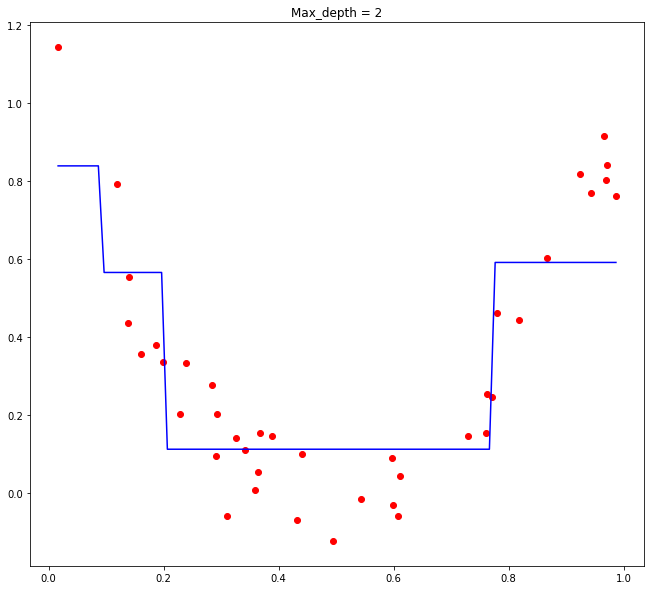

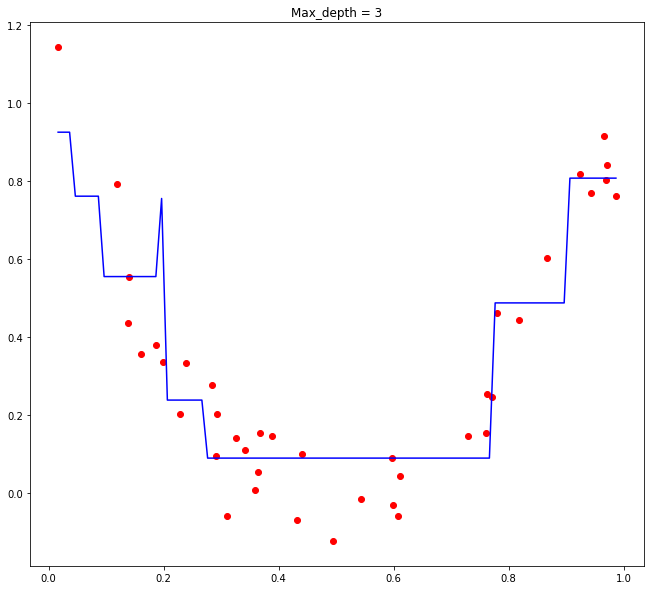

In [158]:
task = pd.read_csv("/content/drive/MyDrive/PRML/Lab2/task.csv")
task = pd.DataFrame(data=task)
X_2 = task.copy()
Y_2 = task["Y"]
X_2 = X_2.dropna()
X_2 = X_2.drop("Y",axis = 1)
Y_2 = Y_2.dropna()

X_2 = X_2.to_numpy()
Y_2 = Y_2.to_numpy()
X_2_train,X_2_test,Y_2_train,Y_2_test = tts(X_2,Y_2,test_size=0.2,shuffle=True)

for i in range(1,4):
  if(i==1):
    continue;
  else:
    model = DTR(max_depth = i)
    model.fit(X_2_train,Y_2_train)

    X_grid = np.arange(min(X_2_test), max(X_2_test), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1)) 

    Y_pred = model.predict(X_grid)

    plt.scatter(X_2_test, Y_2_test, color = 'red')
    plt.plot(X_grid,Y_pred,color = 'blue')
    plt.title("Max_depth = " + str(i))
    plt.show()

### Regression part 2

In [162]:
model_2_reg_0 = DTR(min_samples_leaf = 1)
model_2_reg_10 = DTR(min_samples_leaf = 10)
model_2_reg_0.fit(X_2_train,Y_2_train)
model_2_reg_10.fit(X_2_train,Y_2_train)


DecisionTreeRegressor(min_samples_leaf=10)

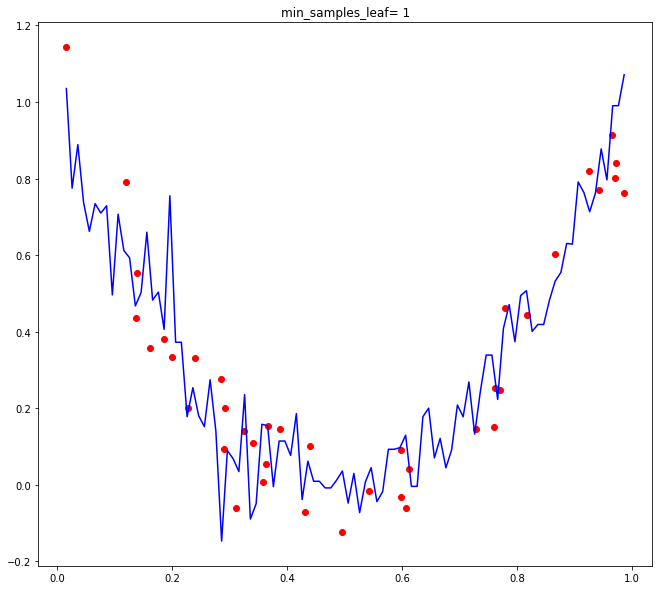

In [163]:
X_grid = np.arange(min(X_2_test), max(X_2_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1)) 

Y_pred = model_2_reg_0.predict(X_grid)

plt.scatter(X_2_test, Y_2_test, color = 'red')
plt.plot(X_grid,Y_pred,color = 'blue')
plt.title("min_samples_leaf= " + str(1))
plt.show()

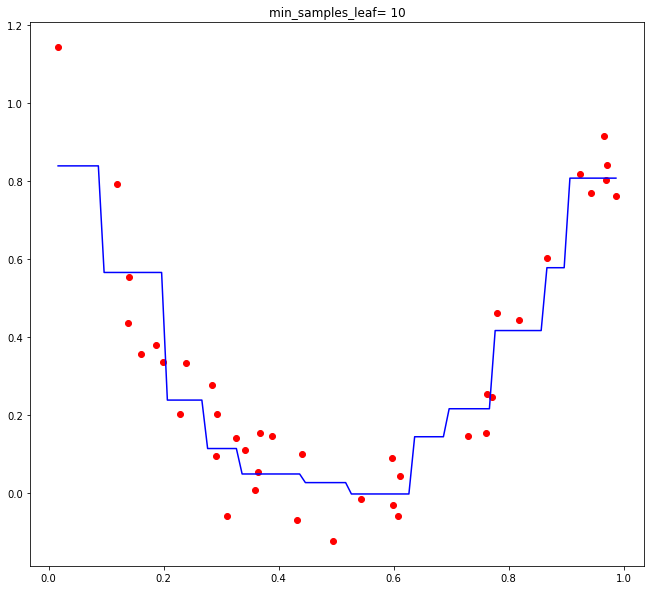

In [164]:
X_grid = np.arange(min(X_2_test), max(X_2_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1)) 

Y_pred = model_2_reg_10.predict(X_grid)

plt.scatter(X_2_test, Y_2_test, color = 'red')
plt.plot(X_grid,Y_pred,color = 'blue')
plt.title("min_samples_leaf= " + str(10))
plt.show()

## Problem 3

### Part 1

In [115]:
dataset  = pd.read_csv("https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/master/palmerpenguins/data/penguins-raw.csv")
peguins = pd.DataFrame(data = dataset)
peguins


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


In [116]:
Xtemp = peguins.copy()
Xtemp = Xtemp.drop(['studyName','Sample Number','Region','Stage','Individual ID','Clutch Completion','Comments','Delta 15 N (o/oo)','Delta 13 C (o/oo)'],axis = 1)
Xtemp

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007-11-11,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007-11-16,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...,...
339,Chinstrap penguin (Pygoscelis antarctica),Dream,2009-11-19,55.8,19.8,207.0,4000.0,MALE
340,Chinstrap penguin (Pygoscelis antarctica),Dream,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE
341,Chinstrap penguin (Pygoscelis antarctica),Dream,2009-11-21,49.6,18.2,193.0,3775.0,MALE
342,Chinstrap penguin (Pygoscelis antarctica),Dream,2009-11-21,50.8,19.0,210.0,4100.0,MALE


In [117]:
Xtemp['Date Egg'] = pd.to_datetime(Xtemp['Date Egg']).dt.strftime('%Y')
Xtemp

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,2007,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...,...
339,Chinstrap penguin (Pygoscelis antarctica),Dream,2009,55.8,19.8,207.0,4000.0,MALE
340,Chinstrap penguin (Pygoscelis antarctica),Dream,2009,43.5,18.1,202.0,3400.0,FEMALE
341,Chinstrap penguin (Pygoscelis antarctica),Dream,2009,49.6,18.2,193.0,3775.0,MALE
342,Chinstrap penguin (Pygoscelis antarctica),Dream,2009,50.8,19.0,210.0,4100.0,MALE


In [118]:
Lb = lb()
Xtemp["Sex"] = Lb.fit_transform(Xtemp["Sex"])
Xtemp["Island"] = Lb.fit_transform(Xtemp["Island"])
Xtemp

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),2,2007,39.1,18.7,181.0,3750.0,1
1,Adelie Penguin (Pygoscelis adeliae),2,2007,39.5,17.4,186.0,3800.0,0
2,Adelie Penguin (Pygoscelis adeliae),2,2007,40.3,18.0,195.0,3250.0,0
3,Adelie Penguin (Pygoscelis adeliae),2,2007,NaN,NaN,NaN,NaN,2
4,Adelie Penguin (Pygoscelis adeliae),2,2007,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...,...,...,...
339,Chinstrap penguin (Pygoscelis antarctica),1,2009,55.8,19.8,207.0,4000.0,1
340,Chinstrap penguin (Pygoscelis antarctica),1,2009,43.5,18.1,202.0,3400.0,0
341,Chinstrap penguin (Pygoscelis antarctica),1,2009,49.6,18.2,193.0,3775.0,1
342,Chinstrap penguin (Pygoscelis antarctica),1,2009,50.8,19.0,210.0,4100.0,1


In [119]:
for i in Xtemp.columns[1:]:
  Xtemp[i] = Xtemp[i].fillna(Xtemp[i].mean())
Xtemp = Xtemp.drop(Xtemp[(Xtemp['Sex'] == 2 )].index,axis = 0)
Xtemp

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),2,2007,39.1,18.7,181.0,3750.0,1
1,Adelie Penguin (Pygoscelis adeliae),2,2007,39.5,17.4,186.0,3800.0,0
2,Adelie Penguin (Pygoscelis adeliae),2,2007,40.3,18.0,195.0,3250.0,0
4,Adelie Penguin (Pygoscelis adeliae),2,2007,36.7,19.3,193.0,3450.0,0
5,Adelie Penguin (Pygoscelis adeliae),2,2007,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...,...
339,Chinstrap penguin (Pygoscelis antarctica),1,2009,55.8,19.8,207.0,4000.0,1
340,Chinstrap penguin (Pygoscelis antarctica),1,2009,43.5,18.1,202.0,3400.0,0
341,Chinstrap penguin (Pygoscelis antarctica),1,2009,49.6,18.2,193.0,3775.0,1
342,Chinstrap penguin (Pygoscelis antarctica),1,2009,50.8,19.0,210.0,4100.0,1


In [120]:
Y = Xtemp["Species"]
X =Xtemp.copy()
X

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),2,2007,39.1,18.7,181.0,3750.0,1
1,Adelie Penguin (Pygoscelis adeliae),2,2007,39.5,17.4,186.0,3800.0,0
2,Adelie Penguin (Pygoscelis adeliae),2,2007,40.3,18.0,195.0,3250.0,0
4,Adelie Penguin (Pygoscelis adeliae),2,2007,36.7,19.3,193.0,3450.0,0
5,Adelie Penguin (Pygoscelis adeliae),2,2007,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...,...
339,Chinstrap penguin (Pygoscelis antarctica),1,2009,55.8,19.8,207.0,4000.0,1
340,Chinstrap penguin (Pygoscelis antarctica),1,2009,43.5,18.1,202.0,3400.0,0
341,Chinstrap penguin (Pygoscelis antarctica),1,2009,49.6,18.2,193.0,3775.0,1
342,Chinstrap penguin (Pygoscelis antarctica),1,2009,50.8,19.0,210.0,4100.0,1


Text(0.5, 1.0, 'Data Vizualization based count vs islands')

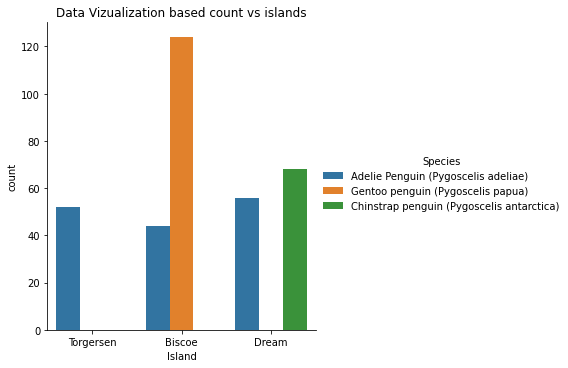

In [121]:
plt.rcParams['figure.figsize'] = [5,5]
s = sns.catplot(x="Island",hue="Species",kind="count",data = peguins,legend=(True))
plt.title("Data Vizualization based count vs islands")

Text(0.5, 1.0, 'Data Vizualization based count vs sex')

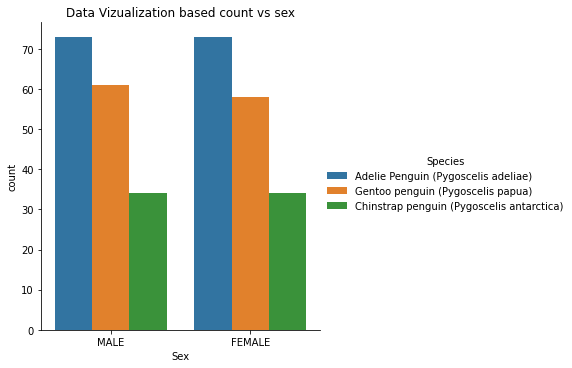

In [122]:
s = sns.catplot(x="Sex",hue="Species",kind="count",data = peguins,legend=(True))
plt.title("Data Vizualization based count vs sex")

Text(0.5, 1.0, 'Data Vizualization based on count vs species')

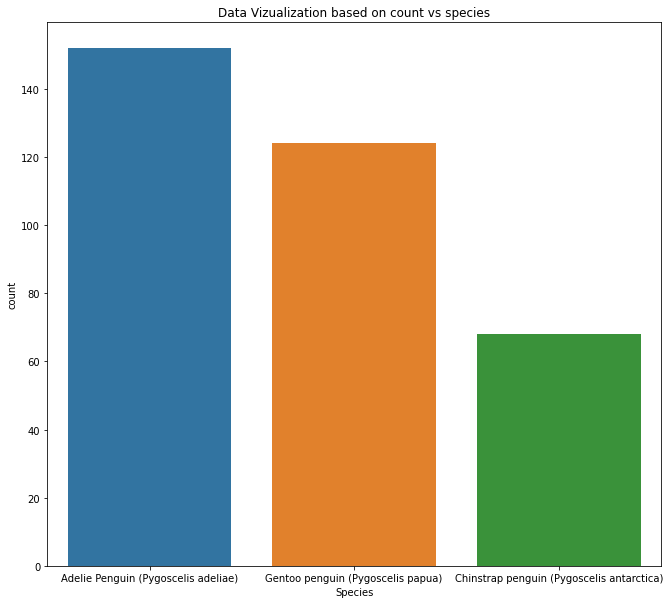

In [123]:
plt.rcParams['figure.figsize'] = [11,10]
s = sns.countplot(data= peguins,x="Species")
plt.title("Data Vizualization based on count vs species")

Text(0.5, 1.0, 'Data Vizualization based on count vs species via islands')

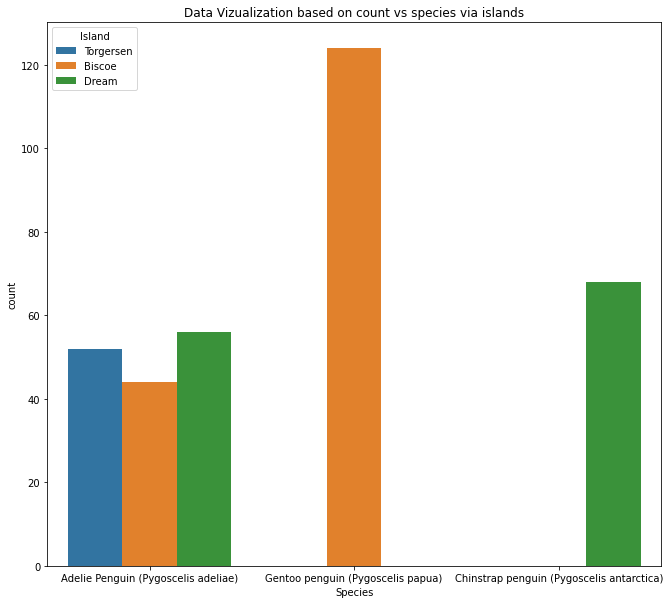

In [124]:
s = sns.countplot(data= peguins,x="Species",hue = "Island")
plt.title("Data Vizualization based on count vs species via islands")

In [125]:
X["Species"] = lb().fit_transform(X["Species"])
X
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size =0.3,shuffle = True)

### Part 2

In [126]:
X

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,2,2007,39.1,18.7,181.0,3750.0,1
1,0,2,2007,39.5,17.4,186.0,3800.0,0
2,0,2,2007,40.3,18.0,195.0,3250.0,0
4,0,2,2007,36.7,19.3,193.0,3450.0,0
5,0,2,2007,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...,...
339,1,1,2009,55.8,19.8,207.0,4000.0,1
340,1,1,2009,43.5,18.1,202.0,3400.0,0
341,1,1,2009,49.6,18.2,193.0,3775.0,1
342,1,1,2009,50.8,19.0,210.0,4100.0,1


In [127]:
def probability_of_class(y,class_n):
    prb = len(np.where(y==class_n)[0])/(len(Y))
    return prb
def prob_feat_class(x,feat,class_n,val,target):
  if(len(np.where(x[feat] == val)[0]) == 0):
    return 0
  prb = len(np.where((x[target]==class_n)&(x[feat] == val))[0])/(len(np.where(x[feat] == val)[0]))
  return prb
def count_of_feature_class(x,feat,class_n,val,target):
   return len(np.where((x[target]==class_n)&(x[feat] == val))[0])
def count_normal(x,feat,val):
  return len(np.where(x[feat] == val)[0])
def entropy(val):
  if(val == 0 or val == 1):
    return 0
  return ((-1)*val*(math.log(val))/(math.log(2)))
def info_gain(dataset,column,target):
  classes = np.unique(dataset[target])
  entps = 0
  arr = []
  for j in classes:
    entps += entropy(probability_of_class(dataset[target],j))
  feat_uniq = np.unique(dataset[column])
  temp = 0
  for k in feat_uniq:
    sum = 0
    for j in classes:
      entp = entropy(prob_feat_class(dataset,column,j,k,target))
      sum += entp
    temp += (count_normal(dataset,column,k)/ len(dataset[column]))*sum
  return temp
info_gain(X,'Sex','Species')  

1.5199782530545058

### Part 3

In [128]:
def con_to_cat(X,feature_arr):
  for i in feature_arr:
    min_val = X[i].min()
    max_val = X[i].max()
    diff = (max_val - min_val)/2
    for j in X.index:
      for k in range(1,3):
        if(X[i][j] <= min_val + diff*k):
          X[i][j] = k
          break;
con_to_cat(X,['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)'])
X

<ipython-input-128-7ee5f57a1921>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i][j] = k


,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,2,2007,1.0,2.0,1.0,1.0,1
1,0,2,2007,1.0,2.0,1.0,1.0,0
2,0,2,2007,1.0,2.0,1.0,1.0,0
4,0,2,2007,1.0,2.0,1.0,1.0,0
5,0,2,2007,1.0,2.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...
339,1,1,2009,2.0,2.0,2.0,1.0,1
340,1,1,2009,1.0,2.0,2.0,1.0,0
341,1,1,2009,2.0,2.0,1.0,1.0,1
342,1,1,2009,2.0,2.0,2.0,1.0,1


### Part 4 to 7 

In [129]:
Y = X["Species"]
X = X.drop('Species',axis = 1)


In [141]:
class Node:
  def __init__(self,feature=None,threshold=None,left=None,right=None,value=None):
    self.feature = feature
    self.threshold = threshold
    self.right = right
    self.left = left
    self.value = value
  def isLeafNode(self):
    if(self.value == None):
      return False
    return True

class DecisionTree:
  def __init__(self,min_samples_split=2,max_depth =100,n_features = None):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.n_features = n_features   
    self.root = None
  def _common_label(self,Y):
    d = {}
    for i in Y:
      if i in d:
        d[i] += 1
      else:
        d[i] = 1
    if d:
      return max(zip(d.values(), d.keys()))[1]
    else:
      return 0
  def _entropy(self,Y):
    d = {}
    for i in Y:
      if i in d:
        d[i] += 1
      else:
        d[i] = 1
    for i in d:
      d[i] = (d[i])/(len(Y))
    prb_arr = np.array(list(d.values()))
    sum = 0
    for p in prb_arr:
      sum += (-p*(math.log(p))/(math.log(2)))
    return sum
  def _split(self,X_column,split_thres):
    left_index = np.argwhere(X_column <= split_thres).flatten()
    right_index = np.argwhere(X_column > split_thres).flatten()
    return left_index,right_index
  def info_gain(self,Y,X_column,threshold):
    p_entropy = self._entropy(Y)
    left_ind,right_ind = self._split(X_column,threshold)
    n_left = len(left_ind)
    n_right = len(right_ind)
    entropy_left = self._entropy(Y[left_ind])
    entropy_right = self._entropy(Y[right_ind])
    child_entrp = (n_left*entropy_left + n_right*entropy_right)/(len(Y))
    return p_entropy - child_entrp
  def _best_split(self,X,Y,feature_ind):
    best_gain = -1
    split_ind = None
    split_threshold = None
    for feat_ind in range(feature_ind):
      X_column = X[:,feat_ind]
      thres = np.unique(X_column)
      for t in thres:
        gain = self.info_gain(Y,X_column,t)
        if (gain > best_gain):
          best_gain = gain
          split_ind = feat_ind
          split_threshold = t
    return split_threshold,split_ind
  def _grow_the_tree(self,X,Y,depth_of_tree = 0):
    no_samples = X.shape[0]
    no_features = X.shape[1]
    no_labels = len(np.unique(Y))
    if(depth_of_tree >= self.max_depth or no_labels == 1 or no_samples < self.min_samples_split):
      leaf_val = self._common_label(Y)
      return Node(value = leaf_val)
    best_threshold,best_feature = self._best_split(X,Y,no_features)
    left_ind,right_ind = self._split(X[:,best_feature],best_threshold)
    left_tree = self._grow_the_tree(X[left_ind,:],Y[left_ind],depth_of_tree+1)
    right_tree = self._grow_the_tree(X[right_ind,:],Y[right_ind],depth_of_tree+1)
    return Node(best_feature,best_threshold,left_tree,right_tree)
  def _traverse_the_tree(self,x,node):
    if node.isLeafNode():
      return node.value
    if(x[node.feature] <= node.threshold):
      return self._traverse_the_tree(x,node.left)
    return self._traverse_the_tree(x,node.right)
  def Train(self,X,Y):
    if(self.n_features == None):
      self.n_features = X.shape[1]
    else:
      self.n_features = min(self.n_features,X.shape[1]) 
    self.root  = self._grow_the_tree(X,Y)
  def Predict(self,X):
    arr = []
    for i in X:
      arr.append(self._traverse_the_tree(i,self.root)) 
    return np.array(arr)
  def accuracy(self,Y_pred,Y_test):
    return np.sum(Y_pred == Y_test)/(len(Y_test))
  def class_wise_accuracy(self,Y_pred,Y_test):
    arr = np.unique(Y_test)
    d = {}
    temp = []
    for j in Y_test:
      temp.append(j)
    for i in arr:
      cnt = 0
      for j in range(len(Y_pred)):
        # print(Y_test[j])
        if(i == Y_pred[j] and i == temp[j]):
          cnt += 1
      acc = cnt/len(np.where(Y_test == i)[0])
      d[i] = acc
    return d
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size =0.3,shuffle = True)
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size =0.3,shuffle = True)
modell = DecisionTree()
modell.Train(X_train.to_numpy(),Y_train.to_numpy())
Y_pred = modell.Predict(X_test.to_numpy())
print(modell.accuracy(Y_pred,Y_test))
print(modell.class_wise_accuracy(Y_pred,Y_test))

0.95
{0: 0.975609756097561, 1: 0.8, 2: 1.0}
